# Regularized logistic regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_utils
from logistic_regressor import LogisticRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


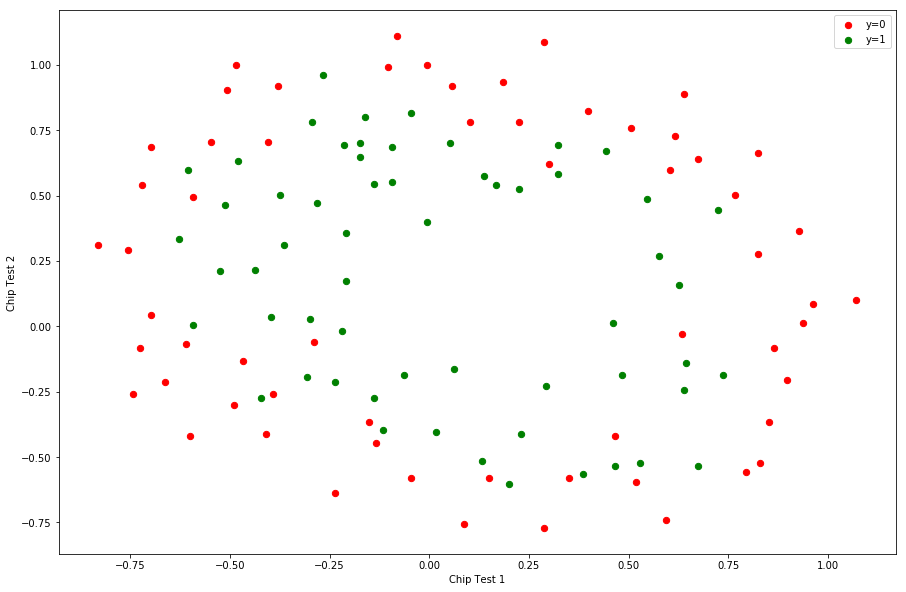

In [4]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print('Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...')
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()

In [5]:
XX = np.vstack([np.ones((X.shape[0],)),X.T]).T
from logistic_regressor import RegLogisticRegressor
log_reg1 = RegLogisticRegressor()
theta = np.ones((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y,100)
grad = log_reg1.grad_loss(theta,XX,y,100)

Optimization terminated successfully.
         Current function value: 0.527358
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Theta found by fmin_bfgs: [ 1.27269396  0.62557467  1.18100087 -2.01918829 -0.91766284 -1.43198459
  0.12374566 -0.36510125 -0.35701398 -0.17489266 -1.45841526 -0.05128871
 -0.61602209 -0.2746478  -1.19284489 -0.24270883 -0.20567992 -0.04498375
 -0.27782423 -0.29524639 -0.45614809 -1.0437548   0.02763874 -0.29264608
  0.01544136 -0.3275867  -0.14388836 -0.9245982 ]
Final loss = 0.4608


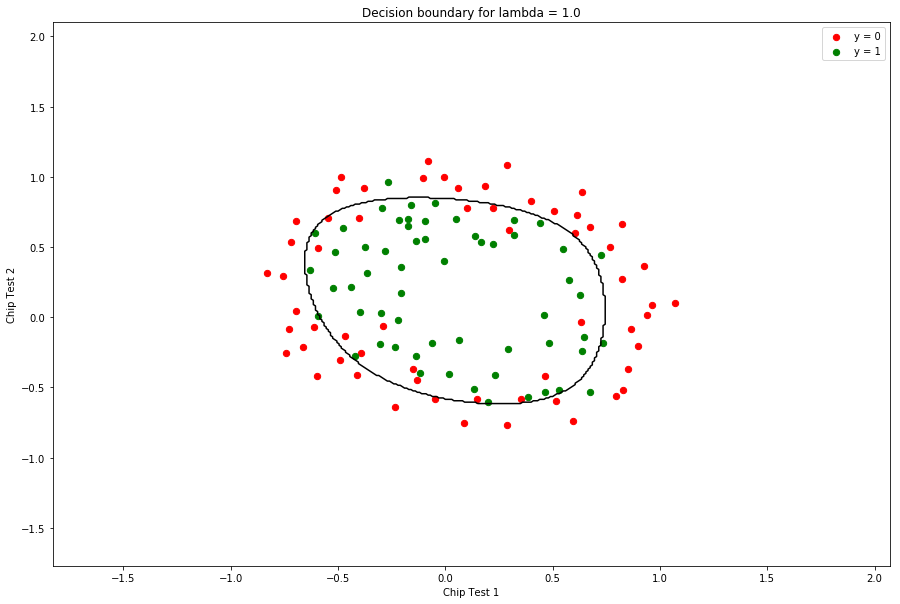

In [6]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 1.0
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print('Theta found by fmin_bfgs: %s' %theta_opt)
print("Final loss = %.4f" %reg_lr1.loss(theta_opt,XX,y,0.0))

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()


In [7]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = sum(predy == y) / len(y)
print("Accuracy on the training set = %.4f" %accuracy)

Accuracy on the training set = 0.8305


# Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg: [[ 5.89106253e-01  1.95454002e-01  5.58913807e-01 -9.86107898e-01
  -3.61900628e-01 -5.82750147e-01 -2.51639321e-02 -1.58019487e-01
  -1.59981994e-01 -1.45612675e-01 -7.58932186e-01 -3.41689773e-02
  -2.88651654e-01 -9.74950793e-02 -6.16273324e-01 -1.80925636e-01
  -9.79992358e-02 -4.05896085e-02 -1.27023699e-01 -1.16537109e-01
  -3.39110258e-01 -5.60445739e-01  5.57877067e-05 -1.43900969e-01
   5.69591879e-04 -1.57722446e-01 -4.39086378e-02 -5.60735202e-01]]
Loss with sklearn theta: 0.5478


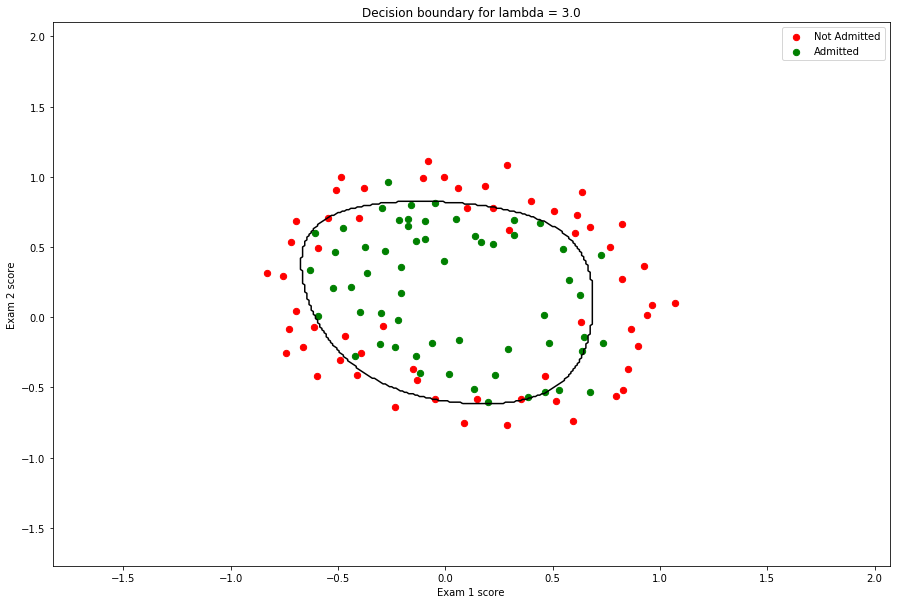

Computing regularization path ...


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

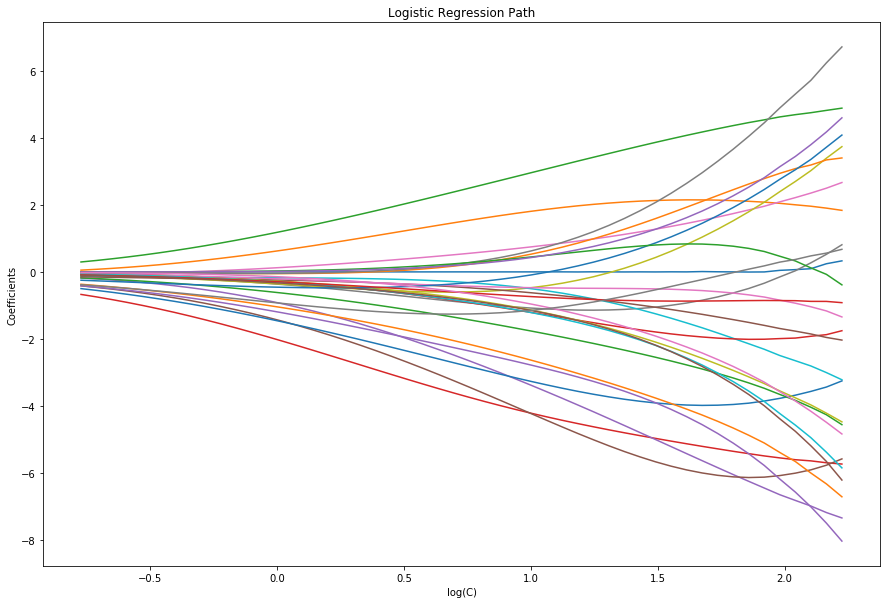

In [28]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg =3.0

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print("Theta found by sklearn with L2 reg: %s" %sk_logreg_l2.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

plot_utils.plot_regularization_path(XX,y,reg,'l2')
plt.show()

# L1 regularized logistic regression

Theta found by sklearn with L1 reg: [[ 0.32974966  0.          0.         -1.37462703  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.76899781  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Loss with sklearn theta: 0.6119


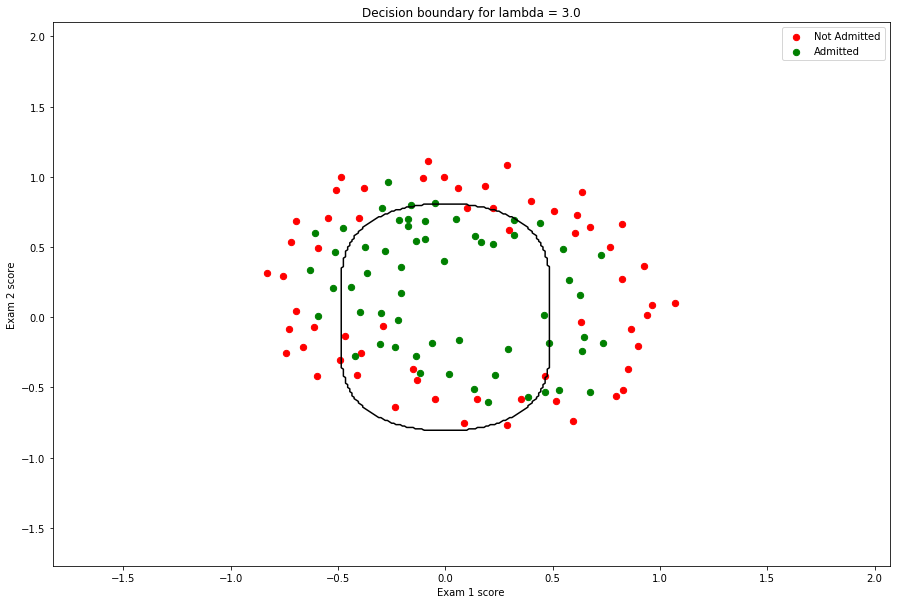

Computing regularization path ...


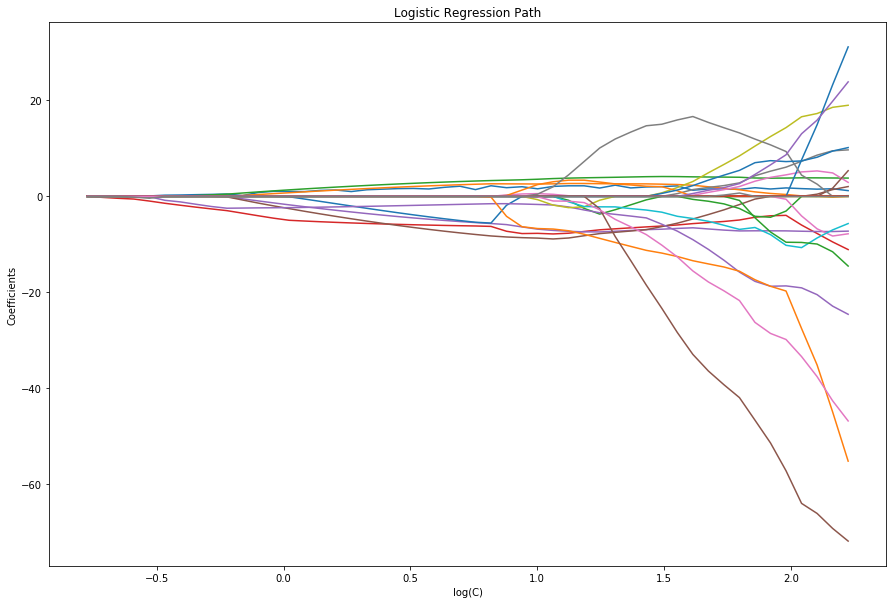

In [27]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print("Theta found by sklearn with L1 reg: %s" %sk_logreg_l1.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l1,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y,reg,'l1')
plt.show()